# 데이터 시각화 도구 - Matplotlib
----------------------------
- `matplotlib`은 그래프나 2차원 데이터 시각화를 생성하는 유명한 파이썬 라이브러리
- 출판물에 필요한 그래프 만드는데 초점.
- Jupyter에 통합되어 편리하게 데이터를 살펴보고 그래프를 만듦

In [1]:
%matplotlib inline

# import matplotlib as mpl

import matplotlib.pyplot as plt
import numpy as np

<br><br><br>

# Line Plot
---------------------------
```python
plt.plot('x축데이터' ,'y축 데이터')
```

> x축, y축 데이터는 `list` 또는 `ndarray` 로 전달하면 된다

### Style
색깔 + 마커모양 + 선스타일
- `rs--` : red + square + -- (dashed line) 모양 
- `bo-.` : blue + circle + -. (dashed dot) 모양
    

### 범위
`xlim`, `ylim` : 각 축의 보여지는 범위 지정


### 축의 tick 설정
`xticks`, `yticks` : 각 축의 한 틱 단위를 설정

### 그리드 설정
`plt.grid(True)` : True 이면 그리드 on

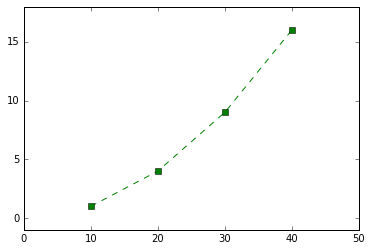

In [24]:
x = [10, 20, 30, 40]
y = [1,4, 9, 16]

plt.plot(x,y, 'gs--')
plt.xlim(0, 50)
plt.ylim(-1, 18);

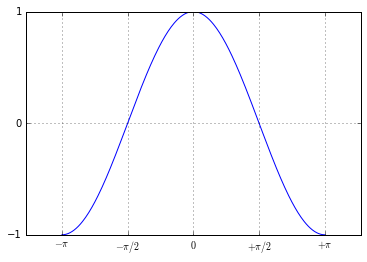

In [45]:
X = np.linspace(-np.pi, np.pi, 256)
C = np.cos(X)
plt.plot(X, C)

# Tick 설정
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], ['$-\pi$', '$-\pi/2$', '$0$', '$+\pi/2$', r'$+\pi$'])
plt.yticks([-1, 0, 1])

# Grid 설정
plt.grid(True)

> 라벨 문자열에는 `$   $` 사이에 LaTeX 수학 문자식을 넣을 수도 있다.

<br><br><br>

# 여러개의 Plot
----------------------

- 라인 플롯에서 선을 하나가 아니라 여러개를 그리고 싶은 경우에는 x 데이터, y 데이터, 스타일 문자열을 반복하여 인수로 넘긴다. 
- 이 경우에는 하나의 선을 그릴 때 처럼 x 데이터나 스타일 문자열을 생략할 수 없다.

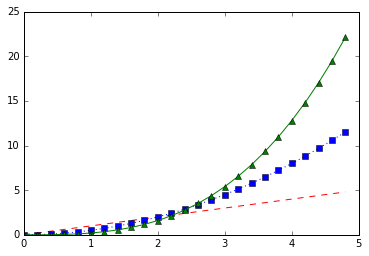

In [50]:
t = np.arange(0., 5., 0.2)
plt.plot(t, t, 'r--', t, 0.5*t**2, 'bs:', t, 0.2*t**3, 'g^-');

### Hold
하나의 `plot` 명령이 아니라 복수의 `plot` 명령을 하나의 그림에 겹쳐서 그릴 수도 있다. 
- `hold(True)` : 기존의 그림 위에 겹쳐 그리도록 하는 명령
- `hold(False)` : 겹치기를 종료

### Legend
여러개의 라인 플롯을 동시에 그리는 경우에는 각 선이 무슨 자료를 표시하는지를 보여주기 위해 `legend` 명령으로 범례(legend)를 추가할 수 있다. 
- `loc` : 범례의 위치는 자동으로 정해지지만 수동으로 설정


### Title
- `title` : Plot 의 타이틀을 결정 할 수 있음

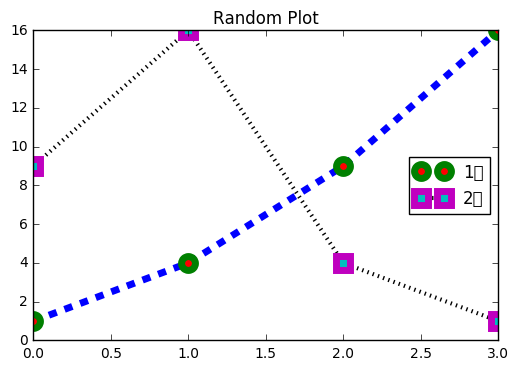

In [5]:
plt.plot([1,4,9,16], c="b", lw=5, ls="--", marker="o", ms=10, mec="g", mew=5, mfc="r", label='1번')
plt.hold(True)
plt.plot([9,16, 4, 1], c="k", lw=3, ls=":", marker="s", ms=10, mec="m", mew=5, mfc="c", label='2번')
plt.hold(False)
plt.legend(loc=0)
plt.title("Random Plot")

## subplot
때로는 다음과 같이 하나의 윈도우(Figure)안에 여러개의 플롯을 배열 형태로 보여야하는 경우도 있다. Figure 안에 있는 각각의 플롯은 Axes 라고 불리는 객체에 속한다.

```python
subplot(`행`, `열`, `순서`)
```
   
> `subplot` 명령은 세개의 인수를 가지는데 처음 두개의 원소가 전체 그리드 행렬의 모양을 지시하는 두 숫자이고 세번째 인수가 네 개 중 어느것인지를 의미하는 숫자이다.

`subplot` 명령은 그리드(grid) 형태의 Axes 객체들을 생성하는데 Figure가 행렬(matrix)이고 Axes가 행렬의 원소라고 생각하면 된다. 예를 들어 위와 아래 두 개의 플롯이 있는 경우 행이 2 이고 열이 1인 2x1 행렬이다.

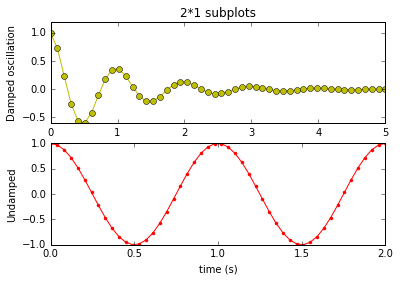

In [51]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'yo-')
plt.title('2*1 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, 'r.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

<br><br><br>
# Contour plot
---------------------

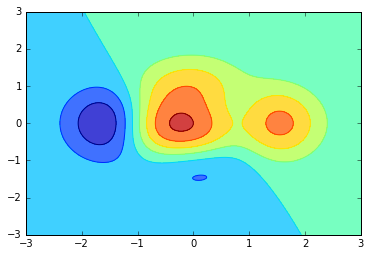

In [62]:
def f(x, y):
    return (1 - x / 2 + x ** 5 + y ** 3) * np.exp(-x ** 2 -y ** 2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
XX, YY = np.meshgrid(x, y)
ZZ = f(XX, YY)

plt.contourf(XX, YY, ZZ, alpha=.75, cmap='jet');
plt.contour(XX, YY, ZZ, linewidth=.5);

<br><br><br>

# Bar
-------------------
x, y 데이터 중 하나가 카테고리 값인 경우에는 `bar` 명령과 `barh` 명령으로 바 차트(bar chart) 시각화를 할 수 있다. 가로 방향으로 바 차트를 그리려면 `barh` 명령을 사용한다.

바 차트 작성시 주의점은 첫번째 인수인 `left` 가 x축에서 바(bar)의 왼쪽 변의 위치를 나타낸다는 점이다. 바의 위치를 xtick 위치의 중앙으로 옮기려면 `align='center'` 인수를 지정해야 한다.

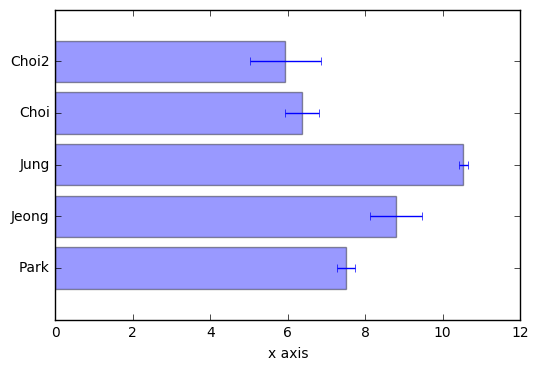

In [8]:
people = ('Park', 'Jeong', 'Jung', 'Choi', 'Choi2')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

#xerr: 에러 바를 추가 할 수 있음
plt.barh(y_pos, performance, xerr=error, align='center', alpha=0.4)
plt.yticks(y_pos, people)
plt.xlabel('x axis');

<br><br><br>
# Histogram
----------------------
히스토그램을 그리기 위한 `hist` 명령도 제공한다. hist 명령은 `bins` 인수로 데이터 집계 구간을 받는다. 또한 반환값으로 데이터 집계 결과를 반환해주므로 이 결과를 다른 코드에서 사용할 수도 있다.

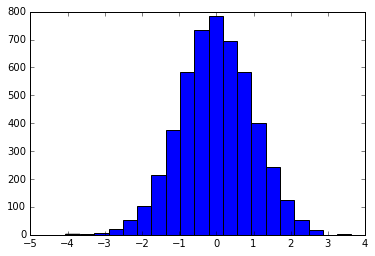

In [66]:
x = np.random.randn(5000)
plt.hist(x, bins=20);

<br><br><br>

# Scatter Plot
-----------------------
두 개의 데이터 집합, 예를 들면 두 벡터의 상관관계를 살펴보려면 `scatter` 명령으로 스캐터 플롯을 그린다.

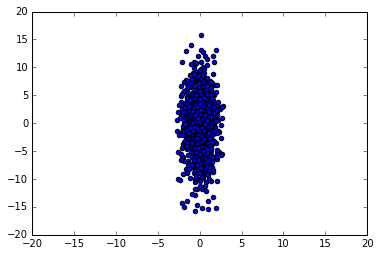

In [71]:
X = np.random.randn(1024)
Y = np.random.normal(0,5,1024)
plt.scatter(X,Y)

plt.xlim(-20,20)
plt.ylim(-20,20)

plt.show()

<br><br><br>

# Image show
-----------------------
화상(image) 데이터는 전형적인 2차원 자료이다.

가장 간단한 2차원 자료 시각화 방법은 `imshow` 명령을 써서 2차원 자료 자체를 각 위치의 명암으로 표시하는 것이다. 자료의 시각화를 돕기위해 다양한 2차원 인터폴레이션을 지원한다.

In [73]:
X = [[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]]

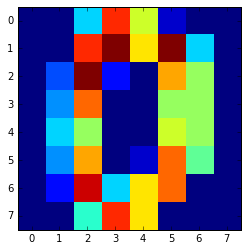

In [78]:
plt.imshow(X, interpolation='nearest', cmap='jet')
plt.grid(False)